GW Theory:
Epoch 0, Loss: 11.0391, params: [0.0095 0.0095]
Original:
Epoch 0, Loss: 11.0350, params: [0.01 0.01]
GW Theory:
Epoch 100, Loss: 0.2214, params: [1.94782716 3.01968888]
Original:
Epoch 100, Loss: 4.8868, params: [0.89495467 0.94859528]
GW Theory:
Epoch 200, Loss: 0.2209, params: [1.92816604 3.00375253]
Original:
Epoch 200, Loss: 1.9740, params: [1.44741132 1.70307912]
GW Theory:
Epoch 300, Loss: 0.2209, params: [1.92836964 3.00370949]
Original:
Epoch 300, Loss: 0.7847, params: [1.72061793 2.25512041]
GW Theory:
Epoch 400, Loss: 0.2209, params: [1.92837142 3.00371394]
Original:
Epoch 400, Loss: 0.3707, params: [1.83848878 2.6159659 ]
GW Theory:
Epoch 500, Loss: 0.2209, params: [1.92837142 3.00371391]
Original:
Epoch 500, Loss: 0.2530, params: [1.88964576 2.82391737]
GW Theory:
Epoch 600, Loss: 0.2209, params: [1.92837142 3.00371391]
Original:
Epoch 600, Loss: 0.2264, params: [1.91265208 2.92925135]
GW Theory:
Epoch 700, Loss: 0.2209, params: [1.92837142 3.00371391]
Original:

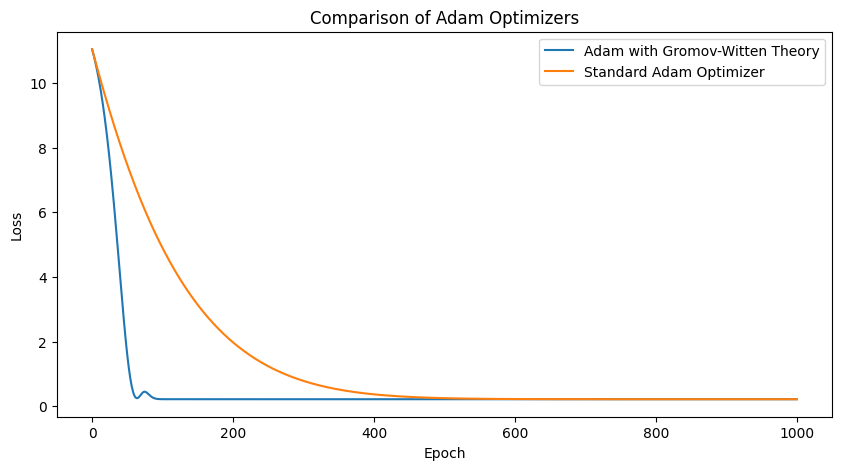

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])


def primary_class_effect(norm):
    return 0.1 * np.sin(norm) * np.exp(-0.1 * norm)

def descendant_class_effect(norm, primary_effect):
    secondary_effect = np.cos(norm) * np.exp(-0.05 * norm)
    return 0.05 * primary_effect * secondary_effect + 0.02 * np.sin(2 * norm)


def compute_persistence(params):
    norm = np.linalg.norm(params)
    return np.exp(-0.1 * norm)  # Placeholder for persistence measure

class AdamOptimizerWithGWTheory:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.base_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
        self.last_persistence = 1

    def update(self, params, grad):
        if self.m is None:
            self.m = np.zeros_like(grad)
            self.v = np.zeros_like(grad)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2

        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)

        # Calculate persistence and adjust learning rate dynamically
        persistence = compute_persistence(params)
        if persistence < self.last_persistence:
            self.learning_rate *= 1.05  # Increase learning rate if features are less persistent
        else:
            self.learning_rate *= 0.95  # Decrease learning rate if features are more persistent
        self.last_persistence = persistence

        params -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return params


class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad):
        if self.m is None:
            self.m = np.zeros_like(grad)
            self.v = np.zeros_like(grad)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2

        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)

        params -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return params


# Initialize both optimizers
complex_optimizer = AdamOptimizerWithGWTheory(learning_rate=0.01)
adam_optimizer = AdamOptimizer(learning_rate=0.01)

# Define the initial parameters
params_complex = np.array([0.0, 0.0])
params_adam = np.array([0.0, 0.0])

losses_complex = []
losses_adam = []


# Training loop for 1000 epochs
for epoch in range(1000):
    grad_complex = compute_gradient(params_complex, x, y)
    grad_adam = compute_gradient(params_adam, x, y)
    
    params_complex = complex_optimizer.update(params_complex, grad_complex)
    params_adam = adam_optimizer.update(params_adam, grad_adam)
    
    y_pred_complex = params_complex[0] * x + params_complex[1]
    y_pred_adam = params_adam[0] * x + params_adam[1]
    
    loss_complex = np.mean((y_pred_complex - y) ** 2)
    loss_adam = np.mean((y_pred_adam - y) ** 2)
    
    losses_complex.append(loss_complex)
    losses_adam.append(loss_adam)

    if epoch % 100 == 0:
        print("GW Theory:")
        print(f"Epoch {epoch}, Loss: {loss_complex:.4f}, params: {params_complex}")
        print("Original:")
        print(f"Epoch {epoch}, Loss: {loss_adam:.4f}, params: {params_adam}")

#Plotting
plt.figure(figsize=(10, 5))
plt.plot(losses_complex, label='Adam with Gromov-Witten Theory')
plt.plot(losses_adam, label='Standard Adam Optimizer')
plt.title("Comparison of Adam Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c161974-9d6a-4482-9d07-5417184f71f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>